# NLP- Analysis

# Abstract:

This notebook consists of :

1. Applying Text_cleaning on reviews grouped by star_ratings
2. Sentiment Analysis including Polarity and Subjectivity
3. Comparing review_polarities vs review_star_ratings to reflect which term is more informative
4. TF_IDF and word_count analysis to reflect how important a word is to a review and how many times it has been repeated
5. Word-Embeding analysis to gain further insights about boutique reviews 

# Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import re
import nltk
import string
import pickle

from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser
from gensim.summarization.textcleaner import split_sentences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from matplotlib import pyplot

from textblob import TextBlob, Word, Blobber
# to install textblob in your conda packages:
# 1. go to anaconda prompt
# 2. cd Anaconda3>Scripts>conda install -c conda-forge textblob
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import required dataframes from web scraping notebook  to start analysing

1. boutique names and information "boutique_info"  
2. boutique reviews "boutique_review"  

In [15]:
#import the final boutique_info dataframe from the web scraping notebooke:
with open('boutique_info.pickle','rb') as f_read:
    boutique_info = pickle.load(f_read)
#set wider columns to check the reviews:    
pd.options.display.max_colwidth = 200 
boutique_info.head()

,boutique_name,rating,number_reviews,price_range,phone_number,address,url_address
0,Kisha Studio Fashion Boutique,5 star rating,120,$$,(415) 422-0468,210 Clement St,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques
1,Morning Lavender,4 star rating,28,$$,(650) 797-0686,1846 Union St,https://www.yelp.com/biz/morning-lavender-san-francisco-2?osq=Clothing+Boutiques
2,Onyx,4.5 star rating,17,$$,(415) 431-6699,289 Divisadero St,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques
3,Wild Feather,5 star rating,29,$$$,(415) 786-2614,597 Haight St,https://www.yelp.com/biz/wild-feather-san-francisco?osq=Clothing+Boutiques
4,Asmbly Hall - formerly on Fillmore Street,4.5 star rating,26,$$,(415) 801-5862,624 Divisadero St,https://www.yelp.com/biz/asmbly-hall-formerly-on-fillmore-street-san-francisco?osq=Clothing+Boutiques


In [16]:
#import the final boutique_review dataframe from the web scraping notebooke:
with open('boutique_reviews.pickle','rb') as f_read:
    boutique_reviews = pickle.load(f_read)
#set wider columns to check the reviews:
pd.options.display.max_colwidth = 500  
#delete unnecessary columns like review_counts:
del boutique_reviews['review_counts']
boutique_reviews.head()

,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings
0,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,Oh my goodness im so in lovewith the dress that I received from kisha studio today. I ordered a black dress that I saw on Instagram on Tuesday the 21st of April it arrived at my mailbox in 4 days. How awesome is that. I really wanted this dress so I asked about it how would it fit because I'm a short chick and yeah that's my problem. But she insured me that it will be okay so I said yes please i want it.. I gave her my cc info thru direct message thru instatram and boom i hit a tracking n...,2020-04-26,5 star rating
1,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"I love Kisha! I always find something I need and want there. Kisha is so helpful and awesome. She always gives great fashion tips, which I need!Price is right and stuff is super cute. Great customer service too. Shop local!",2019-12-15,5 star rating
2,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,This shop has the most adorable selection of clothes and they were having a 4th of July sale where everything was 15% off. They had quite a few prints that were appealing and prices were very reasonable. The owner is very friendly and sweet as well.,2017-07-07,5 star rating
3,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"I've been shopping here for two years now, and I will definitely continue to shop here for unique and fashionable clothes. I've gotten compliments on everything I've worn here. I'm actually wearing a shirt I've gotten at Kisha right now!I've gotten to know Cindy, the owner, and she's the most lovely person you can ever meet. She always has a big smile when my roommates and I enter the shop, and she already knows exactly what our tastes in clothing are. Once we start browsing, she already...",2015-07-20,5 star rating
4,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"LOVE LOVE LOVE Kisha Studio! Cindy is awesome and has the magic power to find you the perfect piece regardless of your needs. My friend who lives in LA even told me to bring her here on her next visit.Here's a very recent example. I went in over the weekend looking last minute for a dress to wear to a wedding. Cindy grabbed two maxi dresses for me to try on. Now I'm 5'3"" aka short and never wear maxi dresses. But both dresses fitted perfectly and looked so good on me that I seriously thought...",2017-09-26,5 star rating


## NLP analysis for a specific boutique name

In [17]:
#create a subset dataframe for the specific boutique
boutique_list=["Onyx", "Wild Feather"]
subset_df = boutique_reviews[boutique_reviews['boutique_names'].isin(boutique_list)]
subset_df

,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings
148,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"The most magical store full of so many beautiful things. A ton of my favorite things are from Onyx. I constantly get compliments on the Molly M Designs wallet that I bought there. The owners are also super nice and helpful, it's always a treat to shop there.",2020-04-02,5 star rating
149,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Onyx is literally a gem on Divis!Quite a gem +'s:+ Fetching collection for both women and men! The clothing designs reflect someone who understands style without being terribly trendy. Quality of materials show that consumers don't want something from Forever 21.+ Jewelry counter is a gem in itself. Don't forget to browse. Very interesting designs that are unique and worth a look or try.+ Pleasant assistance and someone who has an eye! Don't have her name, but that day, the woman at Onyx mad...",2019-01-01,4 star rating
150,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Just had the same experience as Jessie described. This place seemed to be a total gem and I was loving everything until realizing the shop owner was blatantly ignoring me and my boyfriend, with only us 2 in the shop. I never write reviews but I could not believe how rude this woman was. We spent a good amount of time browsing. When I finally approached the counter to look at jewelry and pick up a card I'm thinking ok now she'll at least acknowledge me.She finally dares to acknowledge my exis...",2017-09-10,1 star rating
151,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Onyx is a beautiful boutique! My wife & love it ! It is filled with art (which rotates), clothing and jewelry. Many of the items are from hard to find designers. The owner, Barb, is just fabulous and friendly (as is her dog, Spike). It's a great addition to the neighborhood! Stop by for unique clothing and gifts.",2018-09-03,5 star rating
152,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"A well curated, bright open boutique in the Mission.I wanted to slip into every dress in there! The fabrics are incredible. Some of the softest, lightest, and well made pieces.It is clear every item is picked out for a reason. I was so smitten with each and every cut, pleat, seam and silhouette. They had a particular dress on a mannequin I kept coming back to because I KNEW no matter who put it on it was going to hang beautifully and flatter every curve. I walked back to it about a dozen tim...",2017-07-23,5 star rating
153,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"I live in the neighborhood and love this boutique as well as the ladies who run it. It has a lovely selection with a great variety of prices and styles. Quality clothes, shoes, jewelry and a small selection of skincare products. Buy small, buy local!Thanks Onyx!",2017-03-06,5 star rating
154,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Exquisite designers from San Francisco and around the world. The two owners, Shannon and Barb, have an incredible eye for clothing and accessories- love these women! Subtle aroma from a ""Bir Sur"" scented candle and classic rock on vinyl welcome you at the door. You won't be able to leave without your arms weighted down from new styles and gems!",2018-09-05,5 star rating
155,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"From the same owners of Onyx in the Mission - comes a new Onyx location - conveniently located on boutique lined Divisadero.Onyx Boutique is full of well chosen garments and accessories. From hip Obey faux red leather jackets lined with casual grey hoodie material, to plush lined casual jackets that make you yearn to never take them off - it is brimming with stylish finds. The space is big and 

## Sentiment Analysis:

#### 1. Apply text cleaning and stop-words removal to clean each review
#### 2. Get the sentiment of each review
#### 3. Display polarity over time for each specific boutique to monitor the customer satisfaction during time
we will consider a time period of two years
#### 4.Comparing review_polarity vs review_star_ratings

In [18]:
class sentiment_analysis:
    '''
    this class finds the polarity over time for any given boutique names, calculate the polarity average and displays
    the lineplot for clarification 
    '''
    def __init__(self, boutique_reviews):
        self.boutique_reviews = boutique_reviews
         
    def clean_review(self, boutique_list):
        """
        This function cleans a block of text by applying: text_cleaning and remove_stopwords.
        Input:text = the text to be cleaned.
        Output: the text stripped of punctuation and made lowercase, with no stopwords.
        """        
        subset_df = boutique_reviews[boutique_reviews['boutique_names'].isin(boutique_list)]
        #subset_df = boutique_reviews[self.boutique_reviews.boutique_names in boutique_list]
        for review in subset_df["reviews"]:
            # u'\xa0' represents a non-breaking space in the text block that needs to be removed.
            review = review.replace(u'\xa0', u' ')

            #remove multiple fullstops and make a single fullstop
            review = re.sub('\.+', '. ', review)

            #remove multiple spaces and make a single space.
            review = re.sub(' +', ' ', review)

            #remove all tokens that are not alphabetic
            review = re.sub(r'\d+', '', review)

            #normalization
            review =  review.lower()

            #Define punctuations according to nltk corpus.
            punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~.+'''

            #remove punctuations, traverse the given string and if any punctuation marks occur replace it with null 
            for i in review: 
                if i in punctuations: 
                    review = review.replace(i, "") 

            tokens = word_tokenize(review)
            #remove stopwords
            stop_words = set(stopwords.words('english'))
            tokens = [token for token in tokens if not token in stop_words]
            #return the cleaned text in a sentence format.
            cleaned_review = ' '.join([''.join(token) for token in tokens])
            subset_df_clean = subset_df.replace(review, cleaned_review, inplace=False)

        return subset_df_clean
    
    
    def subset_df_sentiment(self, subset_df_clean):
        polarity = []
        subjectivity = []
        for review in subset_df_clean["reviews"]:
            polarity.append(TextBlob(review).sentiment.polarity)
            subjectivity.append(TextBlob(review).sentiment.subjectivity)

        subset_df_clean_sentiment = subset_df_clean
        subset_df_clean_sentiment['polarity'] = polarity
        subset_df_clean_sentiment['subjectivity'] = subjectivity
        return subset_df_clean_sentiment

    
    def df_polarity(self, subset_df_clean_sentiment):
        """
        Returns a Pandas DataFrame containing the date and polarity for each review.
        Columns = date, polarity
        """
        dates = subset_df_clean_sentiment["review_dates"]
        polarity = subset_df_clean_sentiment["polarity"]
        review = subset_df_clean_sentiment["reviews"]

        data = {"date":dates, "polarity":polarity, "review":review}
        df = pd.DataFrame(data).sort_values(by=['date'], ascending=True)#.set_index('date')
        #print(df)
        return df
    
    
    def df_polarity_average(self, df, window=720):
        """
        This function will provide a dataframe containing the sentiment polarity moving average 
        for the window chosen.
    
        Input: df = Pandas dataframe containing review polarity and date columns.
    
        Output: Returns a Pandas dataframe with date and polarity columns representing the moving average polarity every 30 days
        for the chosen window size.
        """
        current_date = df.date.min()
        end_date = df.date.max()

        print("current_date: ", current_date)
        print("end_date: ", end_date)
        window_start = current_date - pd.Timedelta(int(window/2), unit ='D')
        window_end = current_date + pd.Timedelta(int(window/2), unit ='D')

        print("window_start: ", window_start)
        print("window_end: ", window_end)    

        time_delta = pd.Timedelta(30, unit='D') #How often to calculate average
        print("time_delta: ", time_delta)    

        d = []
        while current_date < end_date:
            polarity_average = df.polarity[(df.date < window_end) & (df.date > window_start)].mean()
            d.append({'date':current_date,'polarity':polarity_average})
            window_start += time_delta
            window_end   += time_delta
            current_date += time_delta
            dd = pd.DataFrame(d)
        return dd
    
    
    def display_polarity(self, df, dd, boutique_list):
        plt.figure(figsize=(10,4))
        for boutique in boutique_list:
            sns.lineplot( x="date", y="polarity", data= df, color="blue",alpha=0.3,label=f"{boutique}(polarity)")
            sns.lineplot( x="date", y="polarity", data= dd, color="red",alpha=0.3,label=f"{boutique} (polarity_average)")
            plt.legend(prop={'size': 11})
        plt.grid(alpha=0.3)
        plt.show()
            
    def sentiment_analysis_summary(self, boutique_list):
        subset_df_clean = self.clean_review(boutique_list)
        subset_df_clean_sentiment = self.subset_df_sentiment(subset_df_clean)
        df = self.df_polarity(subset_df_clean_sentiment)
        dd = self.df_polarity_average(df)
        self.display_polarity(df, dd, boutique_list) 
        #return df
       
    def compare_polarity_vs_ratings(self, subset_df_clean):
        print(len(subset_df_clean), "reviews used")
        ratings = sorted(subset_df_clean.review_ratings.unique(),reverse=True)
        plt.figure(figsize=(20,8))
        for rating in ratings:
            sns.distplot(subset_df_clean.polarity[subset_df_clean.review_ratings==rating], kde=True, label=f"{rating} stars")
            plt.legend()
            plt.xlim((-0.75,1))
            plt.xlabel('Sentiment Polarity');
            title = 'Distribution of Review Sentiment by Star Rating'

current_date:  2008-04-05 00:00:00
end_date:  2020-04-26 00:00:00
window_start:  2007-04-11 00:00:00
window_end:  2009-03-31 00:00:00
time_delta:  30 days 00:00:00


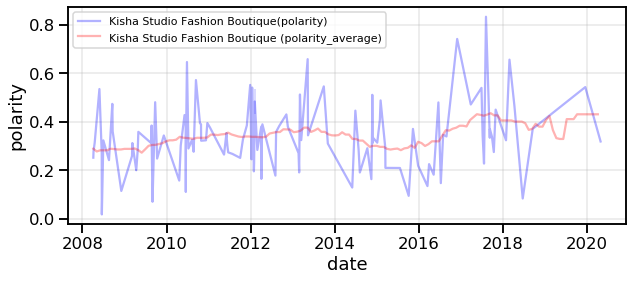

In [19]:
boutique_list=["Kisha Studio Fashion Boutique"]
obj = sentiment_analysis(boutique_reviews)
obj.sentiment_analysis_summary(boutique_list)

# Invoke methods one by one
# subset_df_clean = obj.clean_review(boutique_list)
# subset_df_clean_sentiment = obj.subset_df_sentiment(subset_df_clean)
# df = obj.df_polarity(subset_df_clean_sentiment)
# dd = obj.df_polarity_average(df)
# obj.display_polarity(df, dd, boutique_list)    

**So the sentiment analysis shows that review_polarity for Kishna Boutique will increases during the time.**

**Compare review_polarity vs review_star_ratings**:

120 reviews used


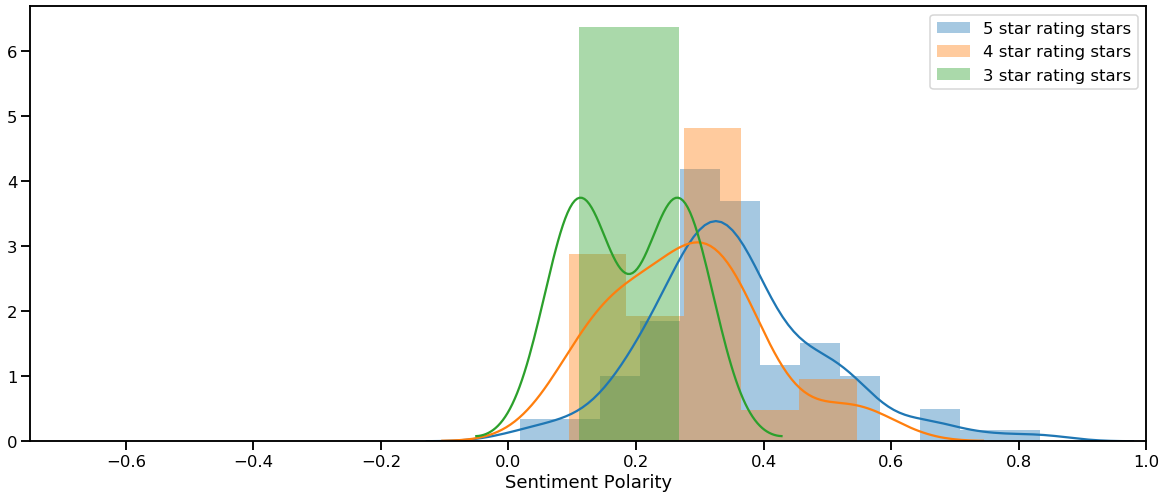

In [20]:
boutique_list=["Kisha Studio Fashion Boutique"]
obj_c = sentiment_analysis(boutique_reviews)
subset_df_clean = obj_c.clean_review(boutique_list)
subset_df_clean_sentiment = obj_c.subset_df_sentiment(subset_df_clean)
obj_c.compare_polarity_vs_ratings(subset_df_clean_sentiment)

**So as predicted, reviews with more star_ratings, have the higher polarity.**

### 5. TF-IDF Analysis

#### tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document.
#### we are counting the most important words for the avarage star ratings

In [24]:
def clean_review(text):
    """
    This function cleans a block of text by applying: text_cleaning and remove_stopwords.
    Input:text = the text to be cleaned.
    Output: the text stripped of punctuation and made lowercase, with no stopwords.
    """
    # u'\xa0' represents a non-breaking space in the text block that needs to be removed.
    text = text.replace(u'\xa0', u' ')
    #remove multiple fullstops and make a single fullstop
    text = re.sub('\.+', '. ', text)
    #remove multiple spaces and make a single space.
    text = re.sub(' +', ' ', text)
    #remove all tokens that are not alphabetic
    text = re.sub(r'\d+', '', text)
    #normalization
    text = text.lower()
    
    #Define punctuations according to nltk corpus.
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~.+'''
    #remove punctuations, traverse the given string and if any punctuation marks occur replace it with null 
    for i in text: 
        if i in punctuations: 
            text = text.replace(i, "") 
    tokens = word_tokenize(text)
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    
    #return the cleaned text in a sentence format.
    return ' '.join([''.join(token) for token in tokens]) 

In [25]:
def get_tfidf(boutique_list):
    scores = []
    for boutique in boutique_list:        
        boutique_df = boutique_reviews[boutique_reviews.boutique_names == boutique]
        agg_function = {"number_reviews":lambda x: x.mean(), "reviews": lambda x:list(x),
                        "review_dates":lambda x:list(x), "review_ratings":lambda x:list(x)}
        boutique_df = boutique_df.groupby("boutique_names").aggregate(agg_function)
        reviews = boutique_df.reviews.to_string()
        reviews = reviews.replace(reviews, clean_review(reviews))
        reviews = [reviews]
        #print(reviews)
        #vectorizer = CountVectorizer()
        vectorizer = TfidfVectorizer()
        doc = vectorizer.fit_transform(reviews)
        df = pd.DataFrame(doc.T.todense(), index=vectorizer.get_feature_names(),columns=["tfidf_scores"])
        df["boutique_name"] = boutique
        dd = boutique_info.loc[boutique_info["boutique_name"] == boutique,["rating"]]
        df["average_star_ratings"] = dd["rating"].to_list()[0]
        df.sort_values(by=["tfidf_scores"], ascending=False, inplace=True)
        df_boutique = df.head(10)
        scores.append(df_boutique)
        
        # visualize the tfidf_scores bar plot
        plt.rcParams["figure.figsize"] = [20, 5]
        ax=df_boutique.iloc[0:10].plot.bar(rot=0, fontsize=15,alpha = 0.5)#, color = 'r')
        ax.legend([boutique])
        
    return pd.concat(scores)
# return pd.DataFrame(doc.toarray(), columns=vectorizer.get_feature_names())#, index=boutique_names)

,tfidf_scores,boutique_name,average_star_ratings
onyx,0.248264,Onyx,4.5 star rating
well,0.230531,Onyx,4.5 star rating
jewelry,0.195065,Onyx,4.5 star rating
boutique,0.177332,Onyx,4.5 star rating
great,0.177332,Onyx,4.5 star rating
clothing,0.159599,Onyx,4.5 star rating
shop,0.141865,Onyx,4.5 star rating
like,0.141865,Onyx,4.5 star rating
owners,0.141865,Onyx,4.5 star rating
prices,0.141865,Onyx,4.5 star rating


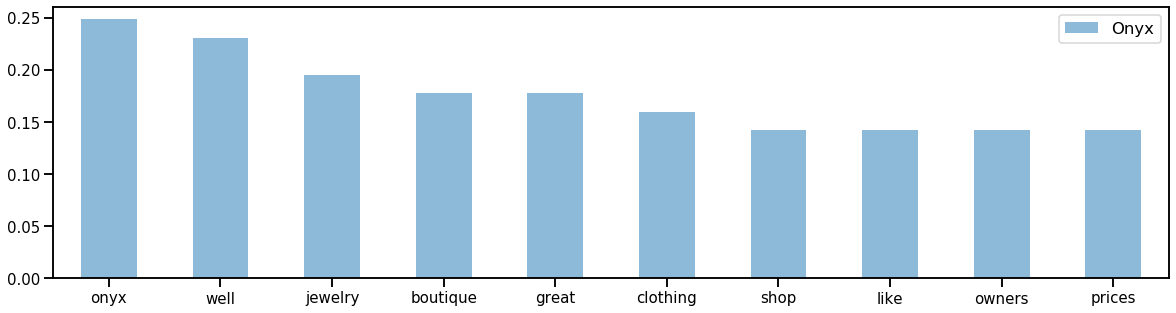

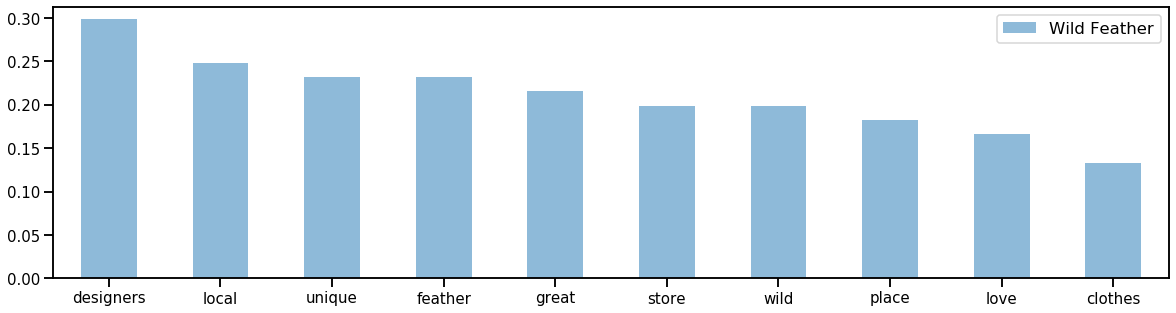

In [26]:
pd.options.display.max_colwidth = 11000 
boutique_list = ["Onyx", "Wild Feather"]
df = get_tfidf(boutique_list)
df

### Word count
we are counting the most repeated words in the reviews for the avarage star ratings

In [30]:
def get_word_count(boutique_list):
    scores = []
    for boutique in boutique_list:        
        boutique_df = boutique_reviews[boutique_reviews.boutique_names == boutique]
        agg_function = {"number_reviews":lambda x: x.mean(), "reviews": lambda x:list(x),
                        "review_dates":lambda x:list(x), "review_ratings":lambda x:list(x)}
        boutique_df = boutique_df.groupby("boutique_names").aggregate(agg_function)
        reviews = boutique_df.reviews.to_string()
        reviews = reviews.replace(reviews, clean_review(reviews))
        reviews = [reviews]
        #print(reviews)
        vectorizer = CountVectorizer()
        #vectorizer = TfidfVectorizer()
        doc = vectorizer.fit_transform(reviews)
        df = pd.DataFrame(doc.T.todense(), index=vectorizer.get_feature_names(),columns=["word_count"])
        df["boutique_name"] = boutique
        dd = boutique_info.loc[boutique_info["boutique_name"] == boutique,["rating"]]
        df["average_star_ratings"] = dd["rating"].to_list()[0]
        df.sort_values(by=["word_count"], ascending=False, inplace=True)
        df_boutique = df.head(10)
        scores.append(df_boutique)
        
        # visualize the word_count bar plot
        plt.rcParams["figure.figsize"] = [20, 5]
        ax=df_boutique.iloc[0:10].plot.bar(rot=0, fontsize=15,alpha = 0.5, color = 'r')
        ax.legend([boutique])
    
    return pd.concat(scores) 